In [35]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [2]:
fullname = "selected_models/04.12.2020_12.27/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [3]:
models.all_memberships

{0: array([6.80413690e-01, 0.00000000e+00, 1.74054291e-01, 6.55504339e-01,
        2.97633601e-01, 2.24692760e-02, 2.00031683e-01, 8.45741898e-01,
        8.54338087e-01, 0.00000000e+00, 0.00000000e+00, 9.66455146e-01,
        2.99383143e-01, 0.00000000e+00, 2.44488121e-01, 1.00000000e+00,
        7.20933541e-01, 1.00000000e+00, 0.00000000e+00, 2.05959028e-01,
        6.10252459e-02, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        5.37805778e-01, 6.48753012e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.57756352e-01,
        0.00000000e+00, 6.40450085e-01, 4.46293419e-01, 0.00000000e+00,
        3.89626233e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.26072786e-01, 4.07148918e-01,
        8.65785361e-01, 6.84366930e-01, 4.96949238e-01, 3.64116679e-01,
        0.00000000e+00, 0.00000000e+00, 4.95987829e-01, 0.00000000e+00,
        2.15543919e-04, 2.28125503e-01, 1.33440526e-01, 7.454

In [4]:
models.all_labels

{0: array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]),
 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]),
 2: array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 

In [5]:
models.folds

{'x train 0': array([[ 0.07589439, -0.21910557,  0.8060875 , ..., -0.7119496 ,
         -0.6499323 , -2.1915007 ],
        [-0.11181752, -0.24002978,  0.9893177 , ..., -0.5851634 ,
         -0.77287585, -2.1071646 ],
        [ 0.14849725, -0.14739339,  0.9075504 , ..., -0.5491797 ,
         -0.3200431 , -2.2319224 ],
        ...,
        [-0.13290721, -0.16287413,  0.9775266 , ..., -0.6790531 ,
         -0.8314287 , -2.1313143 ],
        [ 0.03962243, -0.3220379 ,  0.9071696 , ..., -0.5314974 ,
         -0.60306084, -2.2264125 ],
        [ 0.09387444, -0.46786755,  1.2250688 , ..., -0.59407395,
         -0.53081673, -2.3478394 ]]),
 'y train 0': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0

In [6]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)

In [7]:
memberships[0:10]

[0.6804136902880145,
 0.0,
 0.1740542907381245,
 0.6555043394606102,
 0.29763360099882796,
 0.022469275992491045,
 0.20003168347753475,
 0.8457418981403291,
 0.8543380871825262,
 0.0]

In [8]:
predictions = [1 if x >= 0.5 else 0 for x in memberships]

In [9]:
predictions[0:10]

[1, 0, 0, 1, 0, 0, 0, 1, 1, 0]

In [10]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)

In [11]:
labels[0:10]

[0, 0, 0, 1, 0, 0, 1, 1, 1, 0]

In [12]:
len(predictions), len(labels), len(memberships)

(500, 500, 500)

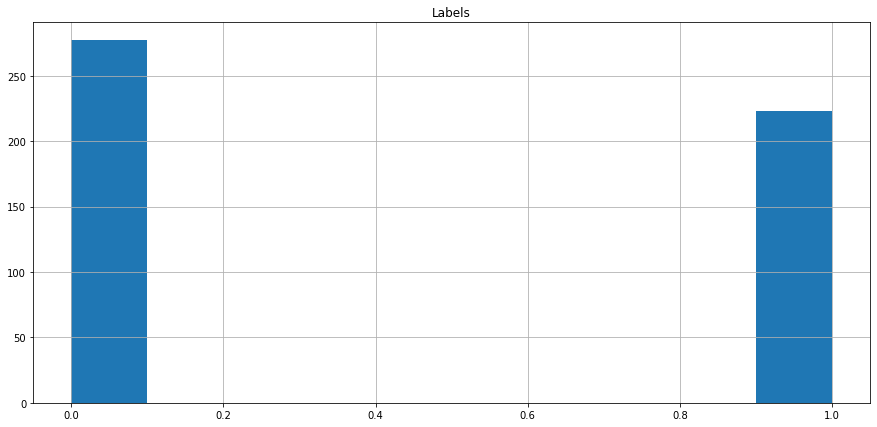

In [13]:
plt.figure(figsize=(15, 7))
plt.hist(labels)
plt.grid()
plt.title("Labels")
plt.show()

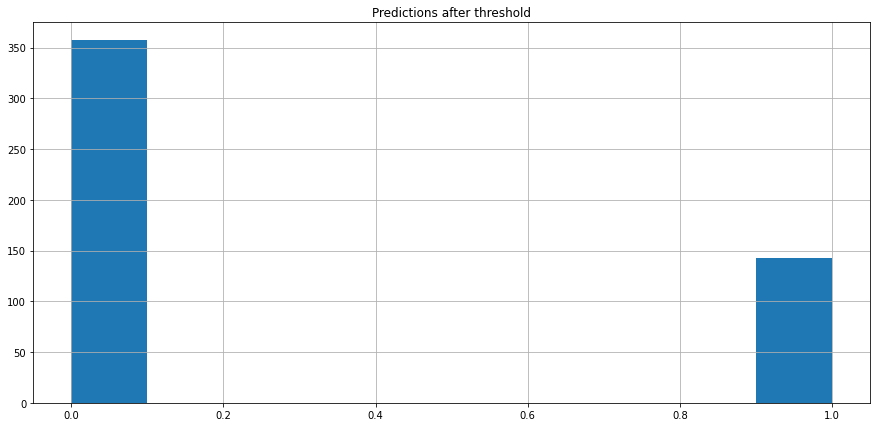

In [14]:
plt.figure(figsize=(15, 7))
plt.hist(predictions)
plt.grid()
plt.title("Predictions after threshold")
plt.show()

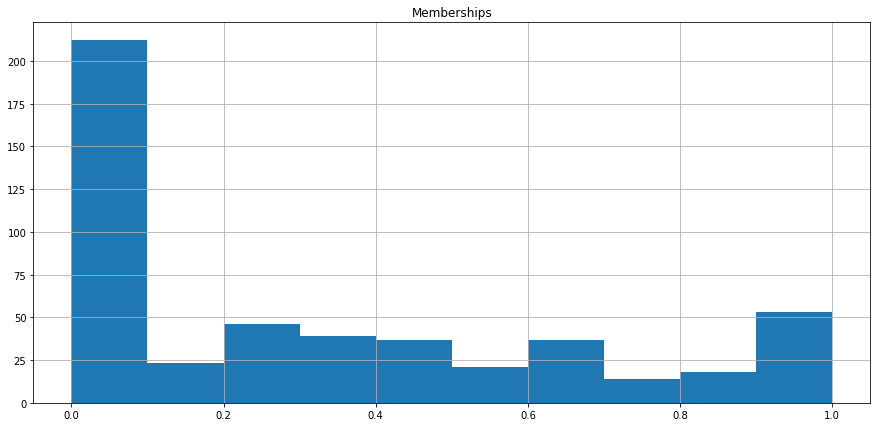

In [15]:
plt.figure(figsize=(15, 7))
plt.hist(memberships)
plt.grid()
plt.title("Memberships")
plt.show()

In [17]:
data[data["Outcome"] == "TP"].head(10)

,Outcome,Label,Prediction,Membership
3,TP,1,1,0.655504
7,TP,1,1,0.845742
8,TP,1,1,0.854338
11,TP,1,1,0.966455
16,TP,1,1,0.720934
17,TP,1,1,1.000000
22,TP,1,1,1.000000
24,TP,1,1,0.537806
33,TP,1,1,0.640450
45,TP,1,1,0.684367


In [18]:
data[data["Outcome"] == "FP"].head(10)

,Outcome,Label,Prediction,Membership
0,FP,0,1,0.680414
15,FP,0,1,1.000000
23,FP,0,1,1.000000
25,FP,0,1,0.648753
37,FP,0,1,1.000000
42,FP,0,1,0.626073
44,FP,0,1,0.865785
70,FP,0,1,1.000000
88,FP,0,1,1.000000
110,FP,0,1,0.788929


In [19]:
data[data["Outcome"] == "FP"].head(10)

,Outcome,Label,Prediction,Membership
0,FP,0,1,0.680414
15,FP,0,1,1.000000
23,FP,0,1,1.000000
25,FP,0,1,0.648753
37,FP,0,1,1.000000
42,FP,0,1,0.626073
44,FP,0,1,0.865785
70,FP,0,1,1.000000
88,FP,0,1,1.000000
110,FP,0,1,0.788929


In [20]:
data[data["Outcome"] == "FN"].head(10)

,Outcome,Label,Prediction,Membership
6,FN,1,0,0.200032
12,FN,1,0,0.299383
21,FN,1,0,0.000000
27,FN,1,0,0.000000
31,FN,1,0,0.457756
35,FN,1,0,0.000000
36,FN,1,0,0.389626
41,FN,1,0,0.000000
46,FN,1,0,0.496949
48,FN,1,0,0.000000


In [21]:
tp = data[data["Outcome"] == "TP"]["Membership"]
fp = data[data["Outcome"] == "FP"]["Membership"]
tn = data[data["Outcome"] == "TN"]["Membership"]
fn = data[data["Outcome"] == "FN"]["Membership"]

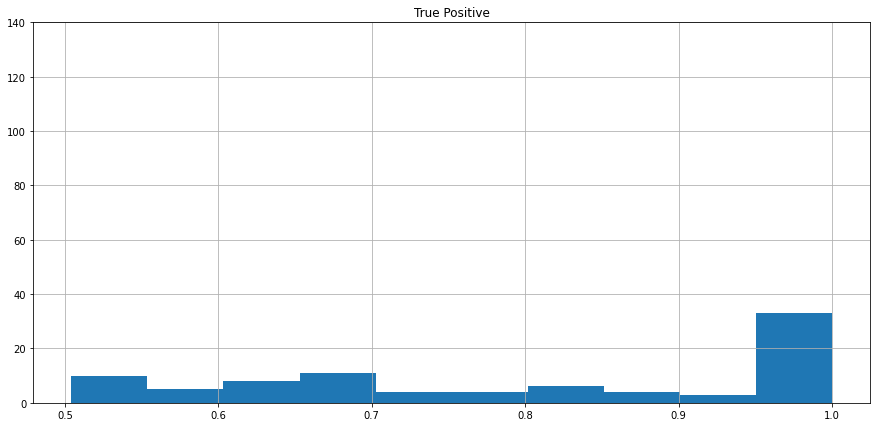

In [22]:
plt.figure(figsize=(15, 7))
plt.hist(tp)
plt.ylim(0,140)
plt.grid()
plt.title("True Positive")
plt.show()

In [16]:
data = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(labels, predictions, memberships):
    if pred == 1:
        if lab == pred:
            data = data.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            data = data.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            data = data.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            data = data.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership
FP 	 0 	 1 	 0.6804136902880145
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.1740542907381245
TP 	 1 	 1 	 0.6555043394606102
TN 	 0 	 0 	 0.29763360099882796
TN 	 0 	 0 	 0.022469275992491045
FN 	 1 	 0 	 0.20003168347753475
TP 	 1 	 1 	 0.8457418981403291
TP 	 1 	 1 	 0.8543380871825262
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 0.966455145687762
FN 	 1 	 0 	 0.2993831434886778
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.24448812126828512
FP 	 0 	 1 	 1.0
TP 	 1 	 1 	 0.7209335408974722
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.2059590276345259
TN 	 0 	 0 	 0.0610252458666537
FN 	 1 	 0 	 0.0
TP 	 1 	 1 	 1.0
FP 	 0 	 1 	 1.0
TP 	 1 	 1 	 0.5378057784011456
FP 	 0 	 1 	 0.6487530120949581
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.45775635245957136
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 0.6404500847962522
TN 	 0 	 0 	 0.446293418557403
FN 	 1 	 0 	 0.0
FN 	 1 	 0 	 0.3896262330586816
FP 	 0 	 1 	 1.0
TN 	 0 	 0 	 0

TP 	 1 	 1 	 0.6760972379637991
TP 	 1 	 1 	 1.0
FN 	 1 	 0 	 0.14321515841702281
TN 	 0 	 0 	 0.23402989306729693
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.32464161708329187
FP 	 0 	 1 	 0.9322598888494691
TN 	 0 	 0 	 0.49103923457321597
TP 	 1 	 1 	 1.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.4406709217947189
FP 	 0 	 1 	 0.5673826756232918
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.32073540655032007
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.2797506643674834
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.09571615998876548
FP 	 0 	 1 	 0.9188705505528922
FN 	 1 	 0 	 0.4257025786419306
FN 	 1 	 0 	 0.20735773487065456
TN 	 0 	 0 	 0.41700878116238527
TN 	 0 	 0 	 0.48167257656905327
FN 	 1 	 0 	 0.3461692017184348
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.434295656261102
FN 	 1 	 0 	 0.0
FP 	 0 	 1 	 0.66239919446017
FN 	 1 	 0 	 0.03139413078141906
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 0.658173943322655
TN 	 0 	 0 	 0.3893581028801023
FP 	 0 	 1 	 0.9612686527704396
FN 	 1 	 0 	 0.0
FP 	 0 	 1 	 0.6327989764622707
FN 	 

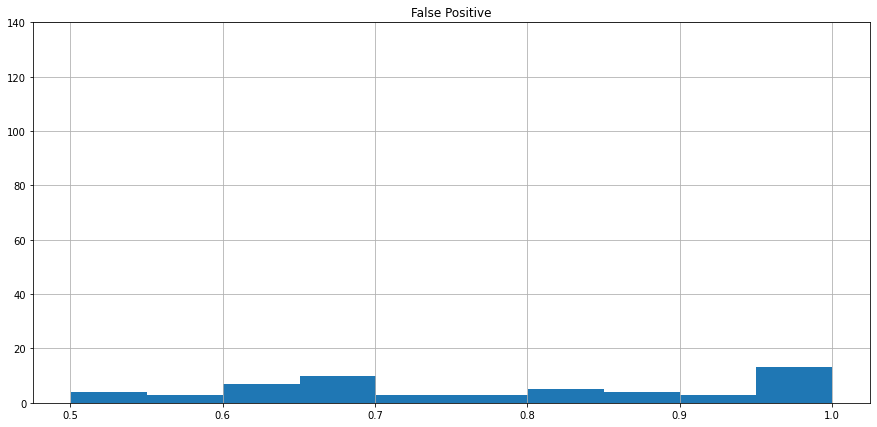

In [23]:
plt.figure(figsize=(15, 7))
plt.hist(fp)
plt.ylim(0,140)
plt.grid()
plt.title("False Positive")
plt.show()

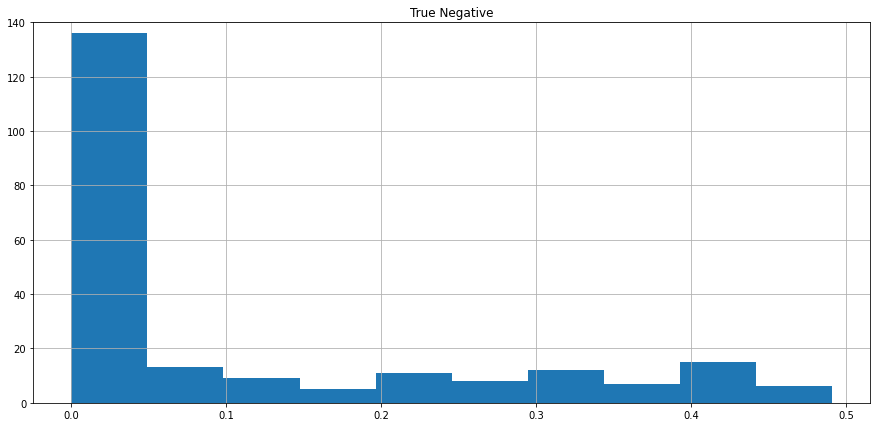

In [24]:
plt.figure(figsize=(15, 7))
plt.hist(tn)
plt.ylim(0,140)
plt.grid()
plt.title("True Negative")
plt.show()

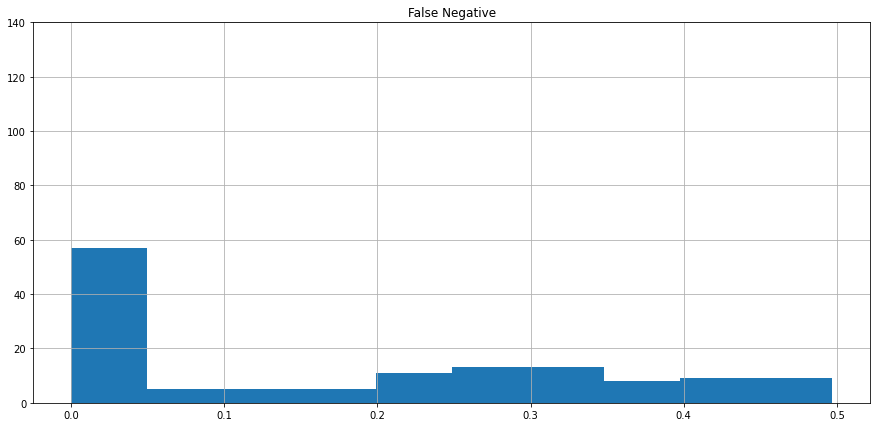

In [25]:
plt.figure(figsize=(15, 7))
plt.hist(fn)
plt.ylim(0,140)
plt.grid()
plt.title("False Negative")
plt.show()

Over 500 news

In [43]:
confusion = pd.DataFrame(confusion_matrix(labels, predictions), 
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
confusion

,Actually fake,Actually not fake
Classified fake,222,55
Classified not fake,135,88


In [26]:
print("TP: ", len(tp))
print("FP: ", len(fp))
print("TN: ", len(tn))
print("FN: ", len(fn))

TP:  88
FP:  55
TN:  222
FN:  135


In [27]:
len(tp)+len(fp)+len(tn)+len(fn)

500

In [28]:
tp_string = data[data["Outcome"] == "TP"]["Outcome"].values
fp_string = data[data["Outcome"] == "FP"]["Outcome"].values
tn_string = data[data["Outcome"] == "TN"]["Outcome"].values
fn_string = data[data["Outcome"] == "FN"]["Outcome"].values

In [29]:
all_cases = []

for i in tp_string:
    all_cases.append(i)
    
for i in fp_string:
    all_cases.append(i)
    
for i in tn_string:
    all_cases.append(i)
    
for i in fn_string:
    all_cases.append(i)

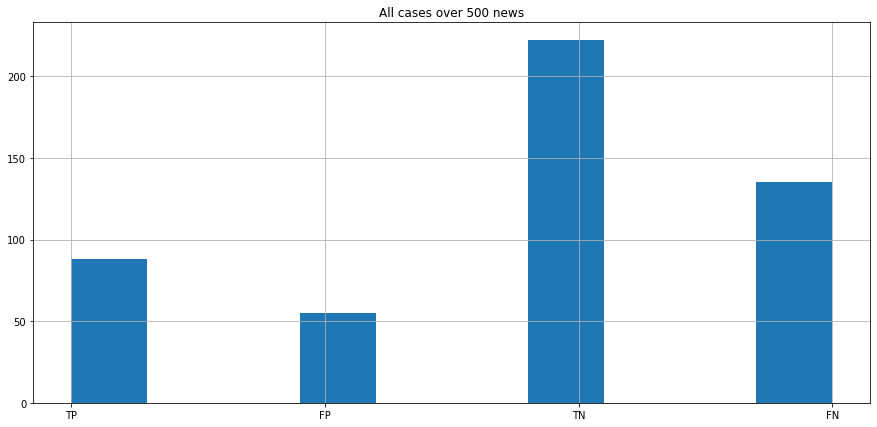

In [30]:
plt.figure(figsize=(15, 7))
plt.hist(all_cases)
plt.grid()
plt.title("All cases over 500 news")
plt.show()

In [31]:
tp.describe(), fp.describe(), tn.describe(), fn.describe()

(count    88.000000
 mean      0.804829
 std       0.178286
 min       0.504137
 25%       0.651267
 50%       0.826183
 75%       1.000000
 max       1.000000
 Name: Membership, dtype: float64,
 count    55.000000
 mean      0.777919
 std       0.160725
 min       0.500602
 25%       0.651204
 50%       0.756584
 75%       0.929937
 max       1.000000
 Name: Membership, dtype: float64,
 count    222.000000
 mean       0.105151
 std        0.154298
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.217261
 max        0.491039
 Name: Membership, dtype: float64,
 count    135.000000
 mean       0.172628
 std        0.168860
 min        0.000000
 25%        0.000000
 50%        0.158186
 75%        0.324737
 max        0.496949
 Name: Membership, dtype: float64)